In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

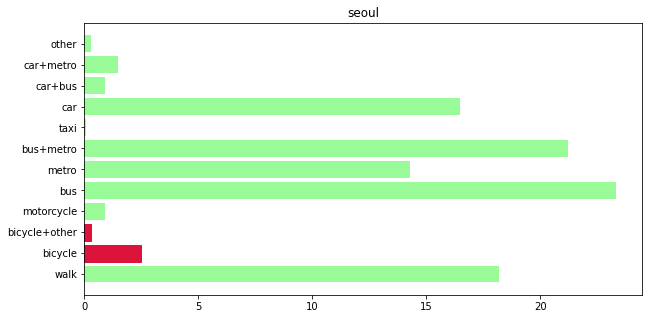

In [2]:
# 통근 데이터
commute = pd.read_table('출퇴근.txt', sep = ',').T

# 통근 데이터 시각화 함수 
def commute_1(x):
    index = commute.index[3:]
    name = commute[x][2]

    data = commute[x].values.tolist()[3:]
    data = [float(i) for i in data]

    barh = plt.barh(index, data, color = 'palegreen', label = 'name')

    barh[1].set_color('crimson')
    barh[2].set_color('crimson')

    plt.title(name)

# plot 사이즈 조절
plt.figure(figsize = (10, 5))

# index는 data 보고 결정
commute_1(0)

In [5]:
# 따릉이 이용 데이터
use = np.load('data.npz', allow_pickle = True)
use = use['arr_0']

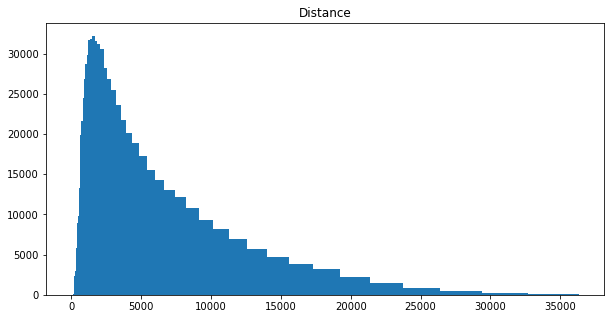

In [26]:
# 따릉이 데이터 histogram
plt.figure(figsize = (10, 5))
plt.title('Distance')

bins = np.exp(np.linspace(0, 10.5, 100))

N, bins, patches = plt.hist(use[:, 10], bins)